# Исследование объявлений о продаже квартир


### Шаг 1. Откройте файл с данными и изучите общую информацию. 
<a id="start"></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
data = pd.read_csv('/datasets/real_estate_data.csv')
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around3000	ponds_nearest	days_exposition    23699 non-null object
dtypes: object(1)
memory usage: 185.3+ KB


* Открыли таблицу. Изучив данные, видим, что все столбцы склеились в один. Необходимо их разъединить, применив в функции read_csv() параметр для разделения колонок sep='\t'

In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


* Теперь столбы в порядке. Изучим данные.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Изучили представленный датафрейм. При выводе данных столкнулись с тем, что данные были склеены в один столбец. И связано это с тем, что в данном случае строки на стобцы разделяли не привычные нам запятые, а знаки табуляции \t. Применив метод к строке чтения файла, корректно разделили данные на столбцы и вывели информацию о данных. Ознакомились с данными. В данных представлено 22 столбца, характеризующие различные данные о продаваемых в разных населенных пунктах Ленинградской области квартирах. Замечаем, что в некоторых колонках есть пропуски.

### Шаг 2. Предобработка данных
<a id="preprocessing"></a>

In [ ]:
data.duplicated().sum()

0

Проверили наличие дубликатов. Дубликаты отсутствуют. Посмотрим, в каких столбцах есть пропуски

In [ ]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заполним пропуски в столбце высота потолков по среднему значению для конкретного населенного пункта. Но сначала удалим пропуски в столбце с населенным пунктом. Таких пропусков 49, что составляет совсем малую долю от общих данных и на исследование не повлияет. 

In [ ]:
data.dropna(subset=['locality_name'], inplace=True) # удалили строки, где пропущены данные о населенном пункте
data['locality_name'].isnull().sum()

0

In [ ]:
median_ceiling = data.groupby('locality_name')['ceiling_height'].agg('median')
median_ceiling

locality_name
Бокситогорск            3.90
Волосово                2.50
Волхов                  2.58
Всеволожск              2.70
Выборг                  2.55
                        ... 
село Путилово           2.55
село Рождествено         NaN
село Русско-Высоцкое    2.60
село Старая Ладога       NaN
село Шум                 NaN
Name: ceiling_height, Length: 364, dtype: float64

Сделав группировку высоты потолков по населенным пунктам, видим, что в некоторых значениях все равно есть пропуски. Скорее всего это связано с тем, что данные по высоте потолков для конкретного населенного пункта ни в одной из строк не указаны. Проверим это на примере одного населенного пункта.

In [ ]:
data.loc[data['locality_name'] == 'село Рождествено']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6754,1,1800000.0,54.2,2017-12-14T00:00:00,2,NaN,3.0,30.0,3,NaN,...,8.3,2.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,98.0
17917,9,1400000.0,39.0,2018-10-15T00:00:00,1,NaN,3.0,16.0,2,NaN,...,8.0,1.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,100.0
23696,18,2500000.0,56.7,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выведем на экран уникальные значения населенных пунктов.

In [ ]:
data['locality_name'].value_counts()

Санкт-Петербург                                            15721
посёлок Мурино                                               522
посёлок Шушары                                               440
Всеволожск                                                   398
Пушкин                                                       369
                                                           ...  
садоводческое некоммерческое товарищество Лесная Поляна        1
деревня Курковицы                                              1
поселок Севастьяново                                           1
посёлок при железнодорожной станции Приветнинское              1
деревня Лупполово                                              1
Name: locality_name, Length: 364, dtype: int64

In [ ]:
len(data['locality_name'].value_counts())

364

Заметили, что слово поселок пишется в одних случаях с "е", в других с "ё", что может привести к появлению
дубликатов. Заменим все ё на е и посмотрим сколько уникальных значений получилось после замены.

In [ ]:
data['locality_name'].replace('ё', 'е', inplace= True, regex= True)
len(data['locality_name'].value_counts())

330

Заменим пропущенные значения в столбце с балконами нулями. Предположим, что если в данной графе стоит пропуск, значит балкона просто нет.

In [ ]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isnull().sum()

0

In [ ]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

Хочется заметить, что основная часть пропусков находится в столбцах таких как, например: расстояние до ближайшего водоема, парка (в этих столбцах мы имеем больше половины пропущенных значений), расстояние до аэропорта, до центра города и т.д. То есть это те значения, которые поступают автоматически, на основе картографических данных. Можем предположить, что при передаче информации информации произошел сбой, вследствие чего получили столько пропущенных значений.


Для остальных данных достаточно сложно найти значения для заполнения пропусков, поэтому оставим их незаполненными.

### Посмотрим на типы данных столбцов

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around300

Замечаем, что в столбце first_day_exposition дата объявления представлена в типе object. Заменим на тип дат. Так будет удобно проводить вычсления с этим столбцом. Применим метод to_datetime()

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверим, изменился ли тип данных в столбце

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_a

In [ ]:
data['floors_total'] = data['floors_total'].astype('int', errors= 'ignore')
data['days_exposition'] = data['days_exposition'].astype('int', errors= 'ignore')


In [ ]:
data['balcony'] = data['balcony'].astype('int')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 23650 non-null int64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_aro

### Шаг 3. Посчитайте и добавьте в таблицу
<a id="newdata"></a>

Посчитаем цену за квадратный метр и добавим новый столбец. Разделим данные столбца last_price(млн) на столбец total_area(кв метры) и добавим новый столбец в dataframe и округлим до десятых.

In [ ]:
data['price_per_meter'] = (data['last_price'] / data['total_area']).round(1)
data['price_per_meter']

0        120370.4
1         82920.8
2         92785.7
3        408176.1
4        100000.0
           ...   
23694     72490.8
23695     52542.4
23696     44091.7
23697    149511.4
23698     41795.7
Name: price_per_meter, Length: 23650, dtype: float64

Добавим в данные столбец с этажем квартиры (первый, последний и другой).

In [ ]:
data['last_floor'] = (data['floors_total'] == data['floor'])*1
data['first_floor'] = (data['floor'] == 1)*1

Добавили столбцы last_floor и first_floor, в которых булевы значения отражают соответствие условию равенста певому или последнему этаже. Напишем функцию, котоая на вход будет принимать строки и возвращать название этажа по условию задачи.

In [ ]:
def floor(row):
    if row['first_floor'] == 1:
        return 'первый этаж'
    if row['last_floor'] == 1:
        return 'последний этаж'
    return 'другой'
data['floors_number'] = data.apply(floor, axis=1)

In [ ]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,last_floor,first_floor,floors_number
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4,0,0,другой
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8,0,1,первый этаж
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7,0,0,другой
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.1,0,0,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.0,0,0,другой
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,NaN,NaN,NaN,NaN,NaN,55.0,95065.8,0,0,другой
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,19143.0,0.0,NaN,0.0,NaN,155.0,99195.7,0,0,другой
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,11634.0,0.0,NaN,0.0,NaN,NaN,110544.7,0,0,другой
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,NaN,NaN,NaN,NaN,NaN,189.0,87454.8,0,0,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,15008.0,0.0,NaN,0.0,NaN,289.0,88524.6,0,0,другой


Добавим в таблицу столбцы с днями недели, месяцем и годом публикации объявления

In [ ]:
data['weekday_number'] = data['first_day_exposition'].dt.weekday
data['weekday_number'].value_counts()

3    4286
1    4175
4    3992
2    3966
0    3606
5    1933
6    1692
Name: weekday_number, dtype: int64

Наипишем функцию для создания нового столбца с названиями дней недели. Для этого посмотрели уникальные значения столбца с числовым обозначением дней недели. Видим, что нумерация дней недели начинается с нуля, соответсвенно 0- понедельник и т.д.

In [ ]:
def weekday(day):
    if day == 0:
        return "понедельник"
    if day == 1:
        return "вторник"
    if day == 2:
        return "среда"
    if day == 3:
        return "четверг"
    if day == 4:
        return "пятница"
    if day == 5:
        return "суббота"
    if day == 6:
        return "воскресенье"
  
data['weekday'] = data['weekday_number'].apply(weekday)
   
    

In [ ]:
data['weekday'].value_counts()

четверг        4286
вторник        4175
пятница        3992
среда          3966
понедельник    3606
суббота        1933
воскресенье    1692
Name: weekday, dtype: int64

In [ ]:
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [ ]:
data['month'].value_counts()

2     2639
3     2582
4     2373
11    2367
10    2124
9     1979
6     1755
8     1742
7     1690
12    1638
1     1491
5     1270
Name: month, dtype: int64

### Соотношение жилой площади к общей и площади кухни к общей площади

In [ ]:
data['living_to_total'] = data['living_area'] / data['total_area']
data['kitchen_to_total'] = data['kitchen_area'] / data['total_area']


Проверим наличие всех добавленных столбцов

In [ ]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_per_meter,last_floor,first_floor,floors_number,weekday_number,weekday,month,year,living_to_total,kitchen_to_total
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,120370.4,0,0,другой,3,четверг,3,2019,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,82920.8,0,1,первый этаж,1,вторник,12,2018,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,92785.7,0,0,другой,3,четверг,8,2015,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,408176.1,0,0,другой,4,пятница,7,2015,NaN,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,100000.0,0,0,другой,1,вторник,6,2018,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,95065.8,0,0,другой,0,понедельник,9,2018,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,99195.7,0,0,другой,3,четверг,11,2017,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,110544.7,0,0,другой,3,четверг,4,2019,NaN,0.263966
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,87454.8,0,0,другой,2,среда,5,2018,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,88524.6,0,0,другой,6,воскресенье,2,2017,0.714754,0.106557


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:
<a id="dataanalysis"></a>


### Гистограмма для площади квартиры
<a id="hist"></a>

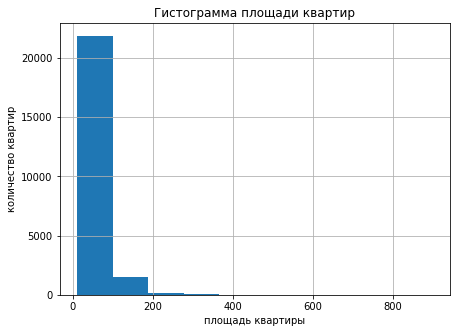

In [ ]:
data['total_area'].hist(figsize=(7,5))
plt.title('Гистограмма площади квартир')
plt.xlabel('площадь квартиры')
plt.ylabel('количество квартир')
plt.show()

Построили гистограмму для площади квартир. Видим, что основная масса значений сосредоточена в самом начале, в диапазоне от 0 до 200 кв метров. Есть выбросы и более высокие, более 800. Посмотрим на значения более детально. Рассмотри гистограмму с диапазоном 0-200.

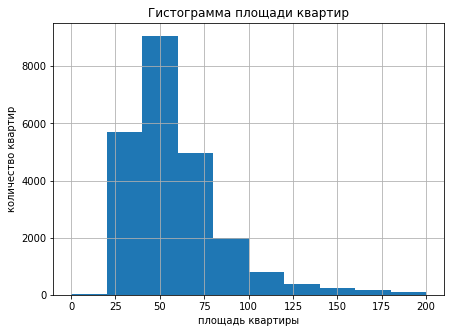

In [ ]:
data['total_area'].hist(range=(0, 200), figsize=(7,5))
plt.title('Гистограмма площади квартир')
plt.xlabel('площадь квартиры')
plt.ylabel('количество квартир')
plt.show()

In [ ]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Посмотрев на определенные статистические данные столбца, можно заметить, что основная масса значений (75 процентов) квартир имеют площадь до 70 квадратных метров. Есть очень большие значения до 900 квадратных метров. Минимальное значение 12 квадратных метров.

## Гистограмма для цены 

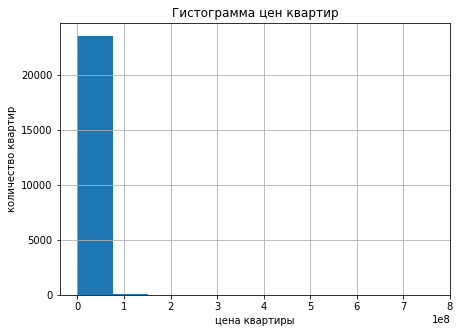

In [ ]:
data['last_price'].hist(figsize=(7,5))
plt.title('Гистограмма цен квартир')
plt.xlabel('цена квартиры')
plt.ylabel('количество квартир')
plt.show()

In [ ]:
data['last_price'].describe().apply(lambda x: format(x, 'f'))

count        23650.000000
mean       6541126.897928
std       10896399.175038
min          12190.000000
25%        3400000.000000
50%        4650000.000000
75%        6799000.000000
max      763000000.000000
Name: last_price, dtype: object

Видим высокое стандартное отклонение, что говорит о больших выбросах отдельных значений столбца. Основная часть цен расположена в диапазоне до 7 миллионов. Рассммотрим данные в этом диапазоне.

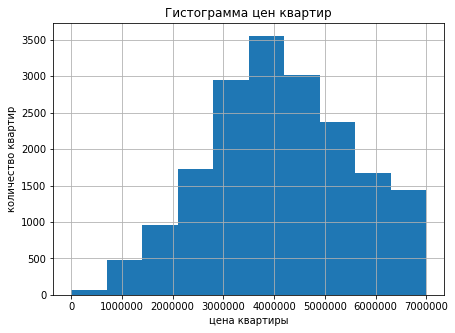

In [ ]:
data['last_price'].hist(range=(0,7000000), figsize=(7,5))
plt.title('Гистограмма цен квартир')
plt.xlabel('цена квартиры')
plt.ylabel('количество квартир')
plt.show()

Наиболее распространены цены на квартиры в диапазоне от 3 до 5 миллионов.

## Гистограмма для числа комнат в квартире

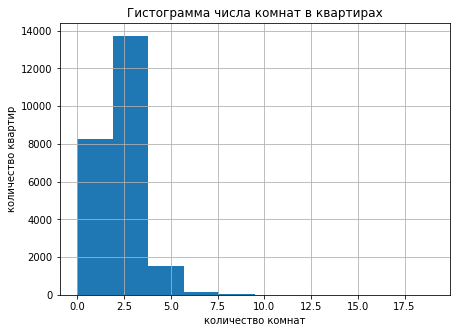

In [ ]:
data['rooms'].hist(figsize=(7,5))
plt.title('Гистограмма числа комнат в квартирах')
plt.xlabel('количество комнат')
plt.ylabel('количество квартир')
plt.show()

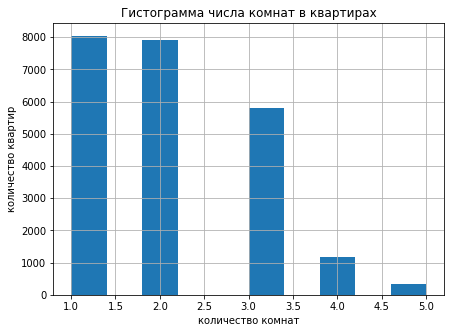

In [ ]:
data['rooms'].hist(range=(1, 5), figsize=(7,5))
plt.title('Гистограмма числа комнат в квартирах')
plt.xlabel('количество комнат')
plt.ylabel('количество квартир')
plt.show()

In [ ]:
len(data[data['rooms'] > 5])

195

Исходя из графика видим, что наибольшая часть квратир имеет до 3 комнат, что в принципе вполне реалистично. А вот максимальное число 19 комнат немного настораживает, действительно ли эта правда. Или в данных ошибка. Квартир, в которых комнат больше пяти всего 195.

## Гистограмма для высоты потолков в квартирах

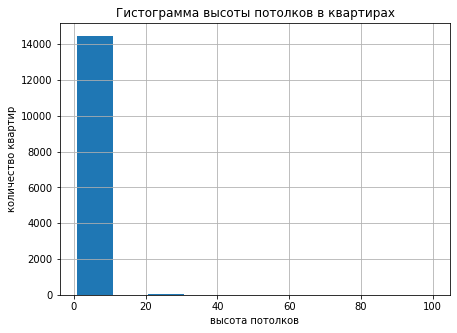

In [ ]:
data['ceiling_height'].hist(figsize=(7,5))
plt.title('Гистограмма высоты потолков в квартирах')
plt.xlabel('высота потолков')
plt.ylabel('количество квартир')
plt.show()

Из графика видим, что основная часть значений несильно друг от друга отличается. Но есть также значения очень высокие, до 100 метров, что скорее всего является ошибкой. Посмотри скольло таких аномально больших значений представлено в таблице.

In [ ]:
data['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

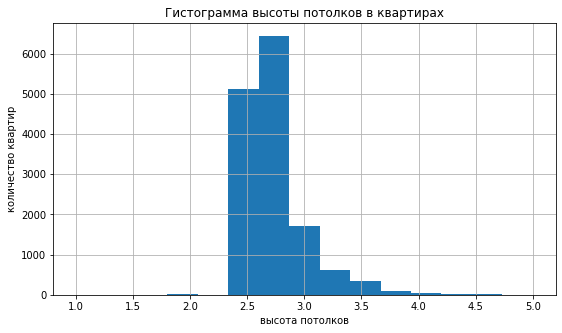

In [ ]:
data['ceiling_height'].hist(bins=15, range=(1,5), figsize=(9,5))
plt.title('Гистограмма высоты потолков в квартирах')
plt.xlabel('высота потолков')
plt.ylabel('количество квартир')
plt.show()

## Время продажи квартиры

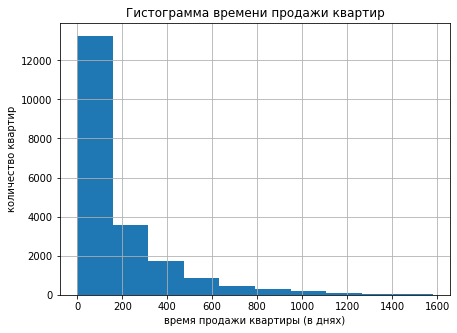

In [ ]:
data['days_exposition'].hist(figsize=(7,5))
plt.title('Гистограмма времени продажи квартир')
plt.xlabel('время продажи квартиры (в днях)')
plt.ylabel('количество квартир')
plt.show()

In [ ]:
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Судя по описанию, основная масса квартир продается за время до 200 дней, что составляют чуть более полугода. Наблюдаем также аномльно высокие значения 1580 дней, что составляет больше четырех лет. Можно сказать, что продажи проходят быстро, когда квартира продается в течение полугода после создания объявления. 

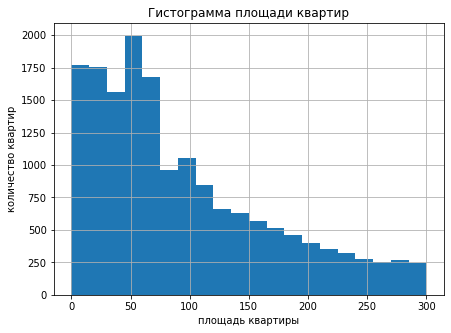

In [ ]:
data['days_exposition'].hist(figsize=(7,5), range=(0, 300), bins=20)
plt.title('Гистограмма площади квартир')
plt.xlabel('площадь квартиры')
plt.ylabel('количество квартир')
plt.show()

## Уберем редкие и выбивающиеся значения
<a id="delete"></a>

Посмотрим на значения столбца с ценой квартир и уберем наиболее редкие и выбивающиеся значения.

In [ ]:
data['last_price'].describe().apply(lambda x: format(x, 'f'))

count        23650.000000
mean       6541126.897928
std       10896399.175038
min          12190.000000
25%        3400000.000000
50%        4650000.000000
75%        6799000.000000
max      763000000.000000
Name: last_price, dtype: object

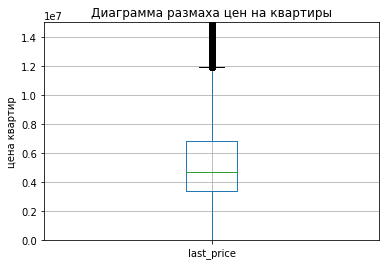

In [ ]:
data.boxplot('last_price')
plt.ylim(0,15000000)
plt.title('Диаграмма размаха цен на квартиры')
plt.ylabel('цена квартир')
plt.show()

По графику видим, что основные значения не превышают 12 миллионов. Отфильтруем данные и оставим только те значения, которые не превышают этого числа.

In [ ]:
data['filt_price'] = ((data['last_price'] < 12000000) & (data['last_price'] > 0))*1

Посмотрим на данные о количестве комнат и уберем аномально высокие.

In [ ]:
data['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

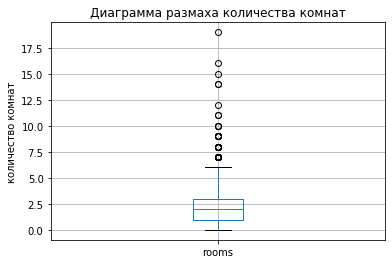

In [ ]:
data.boxplot('rooms')
plt.title('Диаграмма размаха количества комнат')
plt.ylabel('количество комнат')
plt.show()

In [ ]:
len(data[data['rooms'] > 6])

90

Значения комнат больше 6 являются единичными. Таких квартир всего 90. Уберем строки с этими данными.

In [ ]:
data['filt_rooms'] = ((data['rooms'] <= 6) & (data['rooms'] > 0)) *1

Посмотрим на значения о высоте потолков.

In [ ]:
data['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

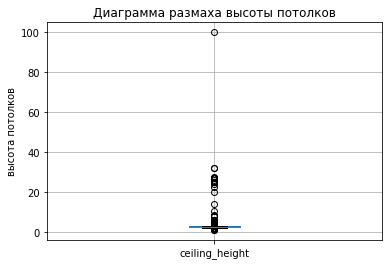

In [ ]:
data.boxplot('ceiling_height')
plt.title('Диаграмма размаха высоты потолков')
plt.ylabel('высота потолков')
plt.show()

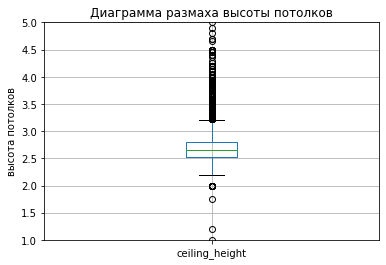

In [ ]:
data.boxplot('ceiling_height')
plt.ylim(1,5)
plt.title('Диаграмма размаха высоты потолков')
plt.ylabel('высота потолков')
plt.show()

In [ ]:
data['filt_ceiling'] = ((data['ceiling_height'] >= 2) & (data['ceiling_height'] <= 4))*1

В столбце по высоте потолков оставили только значения больше двух метров и не превышающие 3 метров.

Посмотрим на данные о площади квартир.

In [ ]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

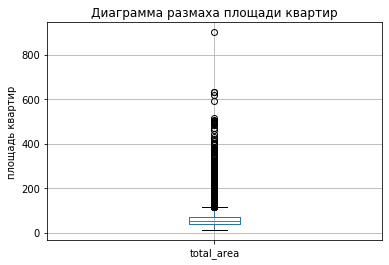

In [ ]:
data.boxplot('total_area')
plt.title('Диаграмма размаха площади квартир')
plt.ylabel('площадь квартир')
plt.show()

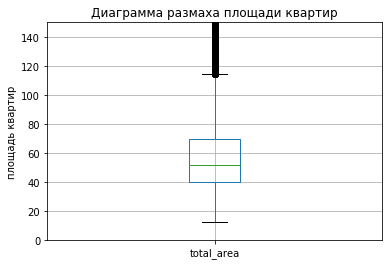

In [ ]:
data.boxplot('total_area')
plt.ylim(0,150)
plt.title('Диаграмма размаха площади квартир')
plt.ylabel('площадь квартир')
plt.show()

In [ ]:
data['filt_area'] = ((data['total_area'] < 120) & (data['total_area'] > 10))*1

Отфильтровали значения площади квартир, оставив квартиры, площадь которых больше 10 и не превышает 120 квадратных метров.

In [ ]:
data['cityCenters_nearest'].describe()

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

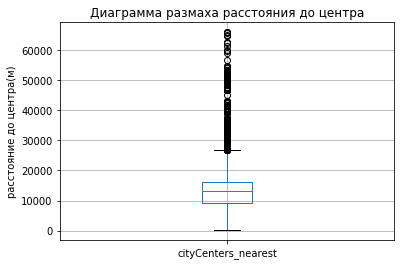

In [ ]:
data.boxplot('cityCenters_nearest')
plt.title('Диаграмма размаха расстояния до центра')
plt.ylabel('расстояние до центра(м)')
plt.show()

In [ ]:
data['filt_center'] = (data['cityCenters_nearest'] < 30000)*1

Теперь создадим переменную, которая будет содержать только те строки, которые соответствуют отфильтрованным значениям.

In [ ]:
good_data = data.query('filt_price == 1 and filt_rooms == 1 and filt_ceiling == 1 and filt_area == 1 and filt_ceiling == 1 and filt_center == 1')

## Какие факторы больше всего влияют на стоимость квартиры?
<a id="datadependency"></a>

Посмотрим как влияет на стоимость квартир их площадь. 

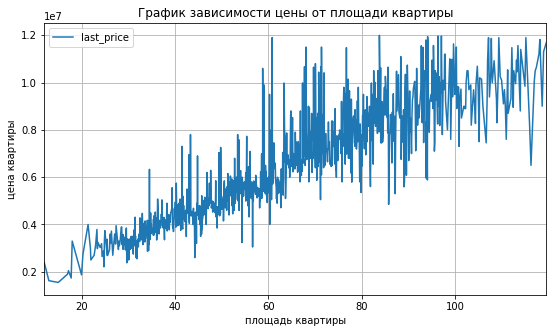

In [ ]:
good_data.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(grid=True, figsize=(9,5))
plt.title('График зависимости цены от площади квартиры')
plt.xlabel('площадь квартиры')
plt.ylabel('цена квартиры')
plt.show()

In [ ]:
good_data['total_area'].corr(data['last_price'])

0.7902927621146663

Корреляция площади и цены квартир равна 0,79, что показывает достаточно сильную прямую зависимость между параметрами.


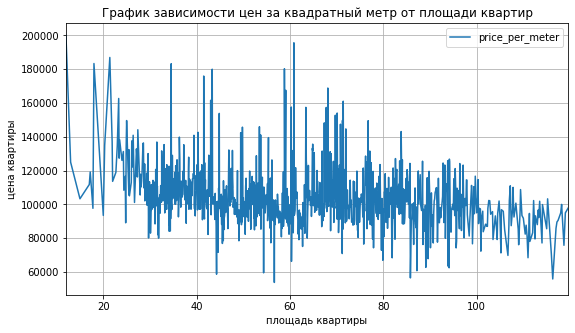

In [ ]:
good_data.pivot_table(index='total_area', values='price_per_meter', aggfunc='median').plot(grid=True, figsize=(9,5))
plt.title('График зависимости цен за квадратный метр от площади квартир')
plt.xlabel('площадь квартиры')
plt.ylabel('цена квартиры')
plt.show()

In [ ]:
good_data['total_area'].corr(data['price_per_meter'])

-0.19234249276576304

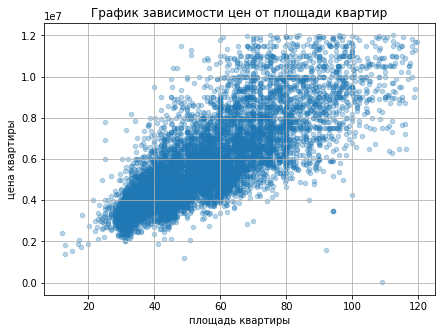

In [ ]:
good_data.plot(kind='scatter', x='total_area', y = 'last_price', alpha=0.3, grid=True, figsize=(7,5))
plt.title('График зависимости цен от площади квартир')
plt.xlabel('площадь квартиры')
plt.ylabel('цена квартиры')
plt.show()

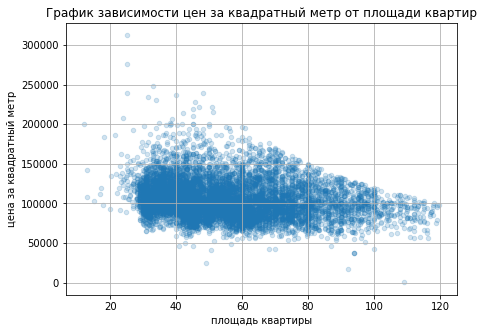

In [ ]:
good_data.plot(kind='scatter', x='total_area', y = 'price_per_meter', figsize=(7,5), alpha=0.2, grid=True)
plt.title('График зависимости цен за квадратный метр от площади квартир')
plt.xlabel('площадь квартиры')
plt.ylabel('цена за квадратный метр')
plt.show()

На графиках типа scatter видна зависимость площади и полной стоимости за квартиру, так и от стоимости за квадратный метр.
Но в первом случае отчетливо видна прямая зависимость. При увеличении площади увеличивается полная стоимость. Но наблюдается уменьше цены за квадратны метр.
Хочется также заметить, что на втором графике максимальные выбросы по данным о цене за кв. метр наблюдаются при меньших значениях площади, что говорит об обратной зависимости.

Если сравнивать площадь и полную стоимость квартиры, замечаем, что чем больше площадь, тем боьше стоимость, что вполне понятно. Но если сравнивать цену за квадратный метр, то здесь зависимость обратно пропорциональна. Чем больше квартира по площади, тем дешевле стоит квадратный метр.

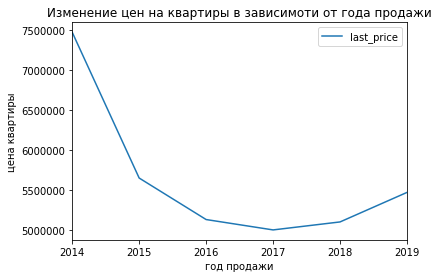

In [ ]:
good_data.pivot_table(index='year', values='last_price', aggfunc='median').plot()
plt.title('Изменение цен на квартиры в зависимоти от года продажи')
plt.xlabel('год продажи')
plt.ylabel('цена квартиры')
plt.show()

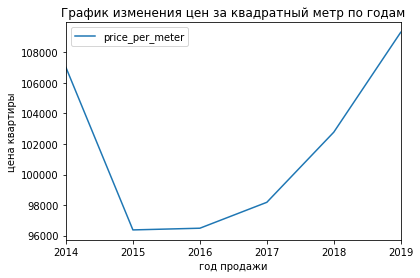

In [ ]:
good_data.pivot_table(index='year', values='price_per_meter', aggfunc='median').plot()
plt.title('График изменения цен за квадратный метр по годам')
plt.xlabel('год продажи')
plt.ylabel('цена квартиры')
plt.show()

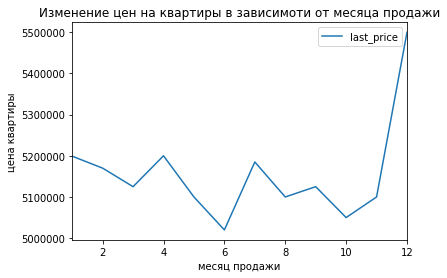

In [ ]:
good_data.pivot_table(index='month', values='last_price', aggfunc='median').plot()
plt.title('Изменение цен на квартиры в зависимоти от месяца продажи')
plt.xlabel('месяц продажи')
plt.ylabel('цена квартиры')
plt.show()

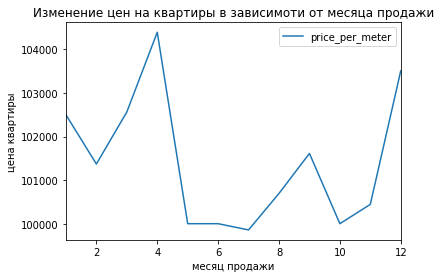

In [ ]:
good_data.pivot_table(index='month', values='price_per_meter', aggfunc='median').plot()
plt.title('Изменение цен на квартиры в зависимоти от месяца продажи')
plt.xlabel('месяц продажи')
plt.ylabel('цена квартиры')
plt.show()

Рассматривая месяц и год публикации объявления о продаже квартиры, замечаем, что стоимость квартир, продаваемых в 2015 году была выше среднего. А вот стоимость квадратного метра с 2017 года растет.

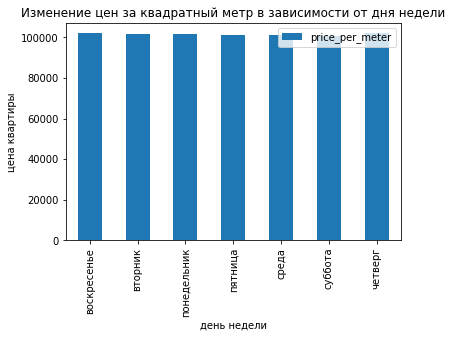

In [ ]:
good_data.pivot_table(index= 'weekday', values='price_per_meter', aggfunc='median').plot(kind='bar')
plt.title('Изменение цен за квадратный метр в зависимости от дня недели')
plt.xlabel('день недели')
plt.ylabel('цена квартиры')
plt.show()

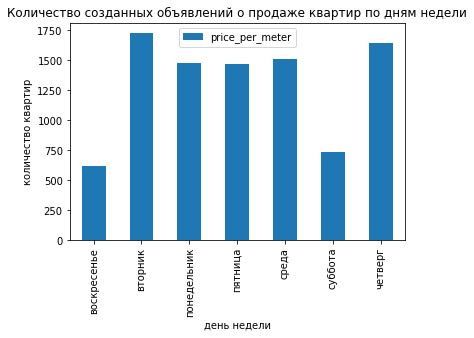

In [ ]:
good_data.pivot_table(index= 'weekday', values='price_per_meter', aggfunc='count').plot(kind='bar')
plt.title('Количество созданных объявлений о продаже квартир по дням недели')
plt.xlabel('день недели')
plt.ylabel('количество квартир')
plt.show()

При изучении зависимости дня недели и стоимости квадратного метра, можно сделать следующие выводы. День недели на стоимость квадратного метра не влияет. А вот количество объявлений чаще всего выкладываются в рабочие дни(будни).

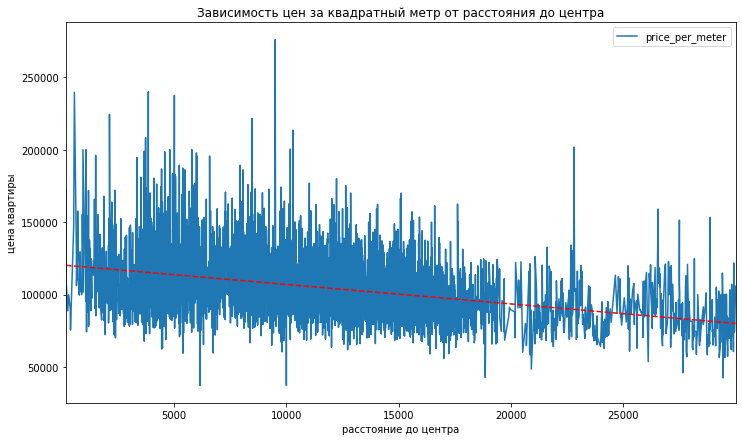

In [ ]:
import numpy as np
to_plot= good_data.pivot_table(index='cityCenters_nearest', values='price_per_meter', aggfunc='median')
to_plot.plot(figsize=(12,7))
plt.title('Зависимость цен за квадратный метр от расстояния до центра')
plt.xlabel('расстояние до центра')
plt.ylabel('цена квартиры')
x=to_plot.index
y=to_plot['price_per_meter']
z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x),'r--') 
plt.show() # Заметен тренд к снижению стоимости по мере удаления от центра

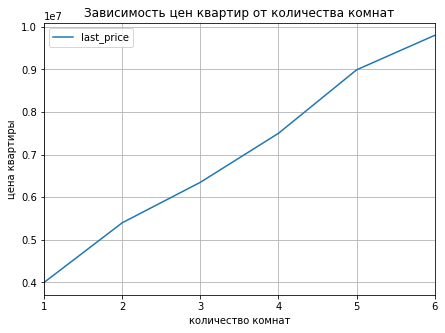

In [ ]:
good_data.pivot_table(index='rooms', values='last_price', aggfunc=('median')).plot(grid=True, figsize=(7,5))
plt.title('Зависимость цен квартир от количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('цена квартиры')
plt.show()

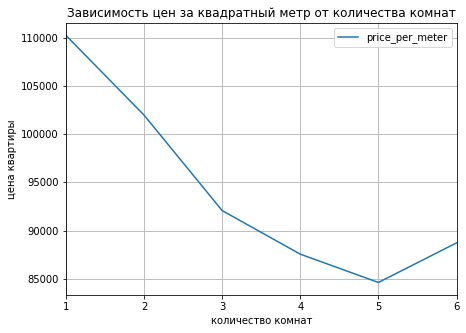

In [ ]:
good_data.pivot_table(index='rooms', values='price_per_meter', aggfunc=('median')).plot(grid=True, figsize=(7,5))
plt.title('Зависимость цен за квадратный метр от количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('цена квартиры')
plt.show()

При сравнении количества комнат и цены, наблюдаем ту же зависимость, что и при сравнении общей площади квартир. Чем больше комнат, тем больше общая стоимость, но меьше цена за квадратный метр.

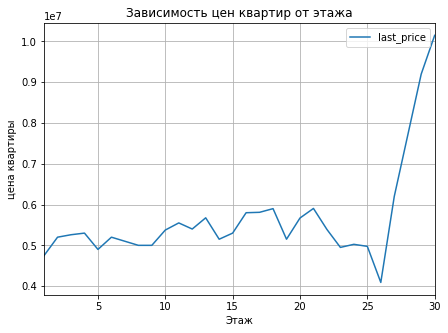

In [ ]:
good_data.pivot_table(index='floor', values='last_price', aggfunc=('median')).plot(grid=True, figsize=(7,5))
plt.title('Зависимость цен квартир от этажа')
plt.xlabel('Этаж')
plt.ylabel('цена квартиры')
plt.show()

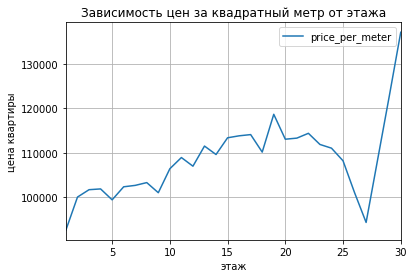

In [ ]:
good_data.pivot_table(index='floor', values='price_per_meter', aggfunc=('median')).plot(grid=True)
plt.title('Зависимость цен за квадратный метр от этажа')
plt.xlabel('этаж')
plt.ylabel('цена квартиры')
plt.show()

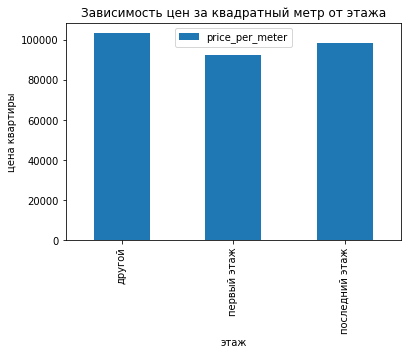

In [ ]:
good_data.pivot_table(index='floors_number', values='price_per_meter', aggfunc=('median')).plot(kind='bar')
plt.title('Зависимость цен за квадратный метр от этажа')
plt.xlabel('этаж')
plt.ylabel('цена квартиры')
plt.show()

В данном случае деление всех этажей на три группы плохо показывает зависимость этажа на стоимость квартир. А вот на графиках выше видно, что на более высоких этажах расположены наиболее дорогие квартиры. 

In [ ]:
good_data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,weekday_number,month,year,living_to_total,kitchen_to_total,filt_price,filt_rooms,filt_ceiling,filt_area,filt_center
total_images,1.000000,0.147644,0.080721,0.056912,0.000144,0.036666,0.066097,0.046882,-0.008947,0.005089,...,-0.001490,-0.003452,0.148041,0.010191,-0.026522,NaN,NaN,NaN,NaN,NaN
last_price,0.147644,1.000000,0.790293,0.514624,0.465959,0.091318,0.654762,0.065736,-0.011706,-0.000778,...,-0.018111,0.006978,0.001952,0.076262,-0.158562,NaN,NaN,NaN,NaN,NaN
total_area,0.080721,0.790293,1.000000,0.798849,0.364441,-0.021168,0.912832,-0.028255,-0.017042,0.005526,...,-0.014155,0.012887,-0.094591,0.292608,-0.417194,NaN,NaN,NaN,NaN,NaN
rooms,0.056912,0.514624,0.798849,1.000000,0.133771,-0.242218,0.893666,-0.184491,-0.016346,0.011498,...,0.001481,0.004794,-0.048290,0.627850,-0.657356,NaN,NaN,NaN,NaN,NaN
ceiling_height,0.000144,0.465959,0.364441,0.133771,1.000000,-0.098794,0.279040,-0.060609,0.012504,0.013323,...,-0.020990,0.006168,-0.091465,-0.066027,0.066038,NaN,NaN,NaN,NaN,NaN
floors_total,0.036666,0.091318,-0.021168,-0.242218,-0.098794,1.000000,-0.188417,0.649835,0.012796,-0.010290,...,0.005602,0.011618,-0.004306,-0.424488,0.364540,NaN,NaN,NaN,NaN,NaN
living_area,0.066097,0.654762,0.912832,0.893666,0.279040,-0.188417,1.000000,-0.139492,-0.006974,0.013003,...,-0.004985,-0.001413,-0.072346,0.638728,-0.626021,NaN,NaN,NaN,NaN,NaN
floor,0.046882,0.065736,-0.028255,-0.184491,-0.060609,0.649835,-0.139492,1.000000,0.013862,-0.008736,...,0.013994,0.011632,0.004482,-0.294273,0.255790,NaN,NaN,NaN,NaN,NaN
studio,-0.008947,-0.011706,-0.017042,-0.016346,0.012504,0.012796,-0.006974,0.013862,1.000000,-0.000154,...,-0.008241,-0.007803,-0.022583,0.030082,NaN,NaN,NaN,NaN,NaN,NaN
open_plan,0.005089,-0.000778,0.005526,0.011498,0.013323,-0.010290,0.013003,-0.008736,-0.000154,1.000000,...,0.008757,0.013959,-0.026311,0.018660,NaN,NaN,NaN,NaN,NaN,NaN


Таблица наглядно демонстрирует наличие прямой или обратной зависимости между различными параметрами.
Если значения отрицательные, значит данные имеют обратнопропорциональную зависимость. Если же больше нуля и приближается к единице, значит зависимость между данными прямая.
Чем ближе значения к нулю или равны нулю, тем менее зависимы между собой элементы.


## 10 населенных пунктов с наибольшим числом объявлений
<a id="10locality"></a>

Выделим 10 населенных пунктов с наибольшим числом объявлений о продаже квартир.

In [ ]:
localy_10 = good_data['locality_name'].value_counts().head(10)
localy_10

Санкт-Петербург         8604
поселок Шушары           147
поселок Парголово        137
Пушкин                   136
Красное Село              69
поселок Металлострой      50
поселок Стрельна          25
Колпино                    9
Петергоф                   3
поселок Лисий Нос          2
Name: locality_name, dtype: int64

In [ ]:
good_data.query('locality_name in @localy_10.index').groupby('locality_name')['price_per_meter'].agg(['mean', 'median', 'count']).round().sort_values(by='median', ascending=False).reset_index()

,locality_name,mean,median,count
0,Петергоф,102428.0,105797.0,3
1,Санкт-Петербург,106164.0,102395.0,8604
2,Пушкин,101923.0,99872.0,136
3,поселок Парголово,90901.0,91040.0,137
4,поселок Стрельна,89835.0,88310.0,25
5,поселок Шушары,80674.0,78688.0,147
6,поселок Металлострой,72736.0,73371.0,50
7,Красное Село,73683.0,72923.0,69
8,Колпино,74397.0,69840.0,9
9,поселок Лисий Нос,66638.0,66638.0,2


Выбрали 10 населенных пунктов с наибольшим количеством объявлений о продаже квартир. Затем посчитали среднюю цену
за квадратный метр в данных населенных пунктах.
Среди полученных населенных пунктов наиболее высокая цена за квадратный метр в Санкт-петербурге (105 тысяч рублей). Самая низкая цена в Колпино (73 тысяч).

### Как зависит цена квартиры от удаленности от центра?
<a id="spbdata"></a>

Посмотрим на квартиры в Санкт-Петербурге.

In [ ]:
spb_city = good_data.query('locality_name == "Санкт-Петербург"').reset_index() #сделаем срез данных только квартир санкт петербурга

Создадим столбец с расстоянием до центра в километрах.

In [ ]:
spb_city['center_km'] = ((spb_city['cityCenters_nearest'] / 1000).round())

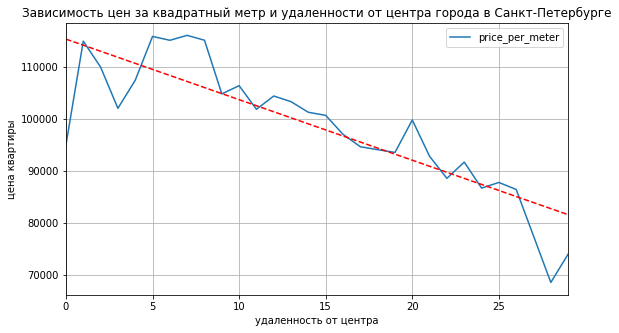

In [ ]:
plot2 = spb_city.pivot_table(index= 'center_km', values = 'price_per_meter', aggfunc = 'median')
plot2.plot(grid=True, figsize=(9, 5))
plt.title('Зависимость цен за квадратный метр и удаленности от центра города в Санкт-Петербурге')
plt.xlabel('удаленность от центра')
plt.ylabel('цена квартиры')
x=plot2.index
y=plot2['price_per_meter']
z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x),'r--')
plt.show()

По мере отдаления от центра города, цена за квадратный метр квартир опускается.

### Выделим центральную зону в Санкт петербурге и исследуем влияние различных показателей на цену
<a id="spbcenterdata"></a>

Исходя из графика наиболее высокую цену имеют квартиры, расположенные приблизительно на расстоянии от 5 до 6 км от центра города. После 6 километра цена начинает падать, поэтому установим границу центральной зоны в 6 км.

In [ ]:
spb_city_center = spb_city.query('center_km <= 6')

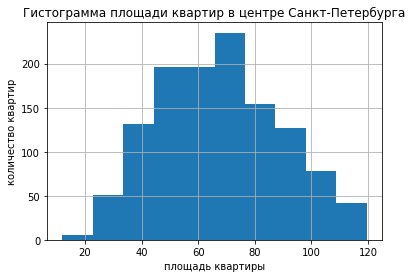

In [ ]:
spb_city_center['total_area'].hist()
plt.title('Гистограмма площади квартир в центре Санкт-Петербурга')
plt.xlabel('площадь квартиры')
plt.ylabel('количество квартир')
plt.show()

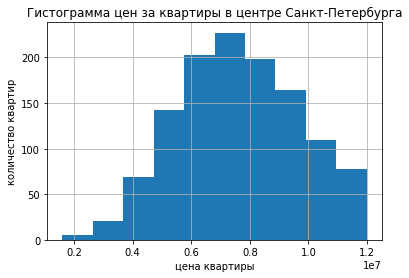

In [ ]:
spb_city_center['last_price'].hist()
plt.title('Гистограмма цен за квартиры в центре Санкт-Петербурга')
plt.xlabel('цена квартиры')
plt.ylabel('количество квартир')
plt.show()

In [ ]:
spb_city_center['last_price'].describe().apply(lambda x: format(x, 'f'))

count        1216.000000
mean      7606704.771382
std       2064463.969403
min       1600000.000000
25%       6100000.000000
50%       7500000.000000
75%       9000000.000000
max      11996000.000000
Name: last_price, dtype: object

Средняя стоимость квартир в центре Санкт-Петербурга равна 7 с половиной миллионам. В общих данных по всем населенным пунктам средняя стоимость составляла 5 с половиной миллионов.

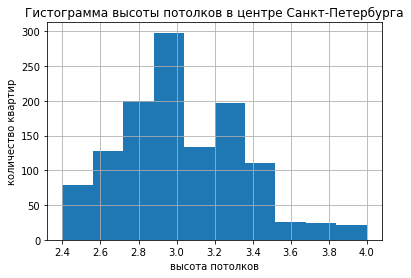

In [ ]:
spb_city_center['ceiling_height'].hist()
plt.title('Гистограмма высоты потолков в центре Санкт-Петербурга')
plt.xlabel('высота потолков')
plt.ylabel('количество квартир')
plt.show()

Высота потолков в основном 2.6 - 2.7 метров

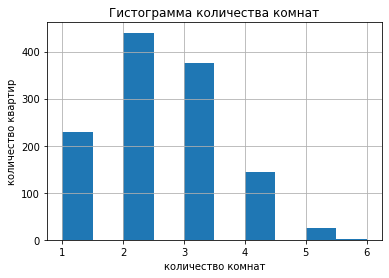

In [ ]:
spb_city_center['rooms'].hist()
plt.title('Гистограмма количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('количество квартир')
plt.show()

Наибольшее число объявлений у двухкомнатных квартир

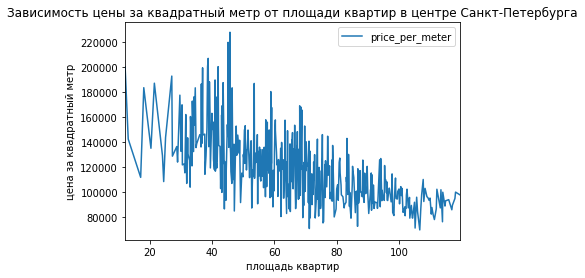

In [ ]:
spb_city_center.pivot_table(index='total_area', values='price_per_meter', aggfunc='median').plot()
plt.title('Зависимость цены за квадратный метр от площади квартир в центре Санкт-Петербурга')
plt.xlabel('площадь квартир')
plt.ylabel('цена за квадратный метр')
plt.show()

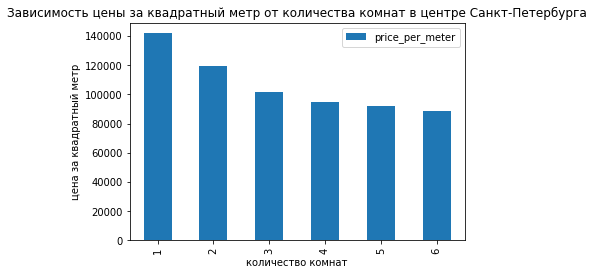

In [ ]:
spb_city_center.pivot_table(index='rooms', values='price_per_meter', aggfunc='median').plot(kind='bar')
plt.title('Зависимость цены за квадратный метр от количества комнат в центре Санкт-Петербурга')
plt.xlabel('количество комнат')
plt.ylabel('цена за квадратный метр')
plt.show()

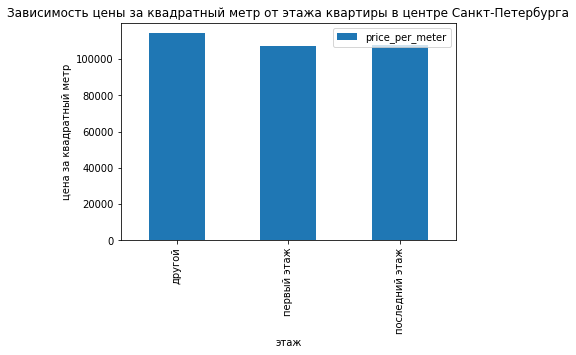

In [ ]:
spb_city_center.pivot_table(index='floors_number', values='price_per_meter', aggfunc='median').plot(kind='bar')
plt.title('Зависимость цены за квадратный метр от этажа квартиры в центре Санкт-Петербурга')
plt.xlabel('этаж')
plt.ylabel('цена за квадратный метр')
plt.show()

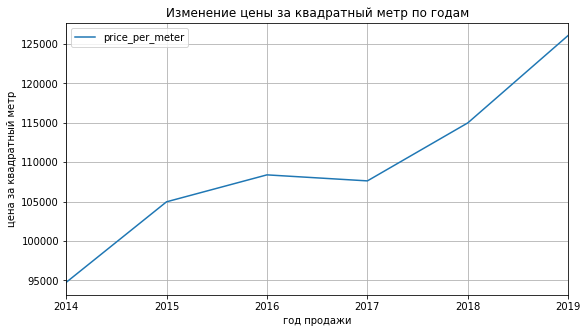

In [ ]:
spb_city_center.pivot_table(index='year', values='price_per_meter', aggfunc='median').plot(grid=True, figsize=(9, 5))
plt.title('Изменение цены за квадратный метр по годам')
plt.xlabel('год продажи')
plt.ylabel('цена за квадратный метр')
plt.show()

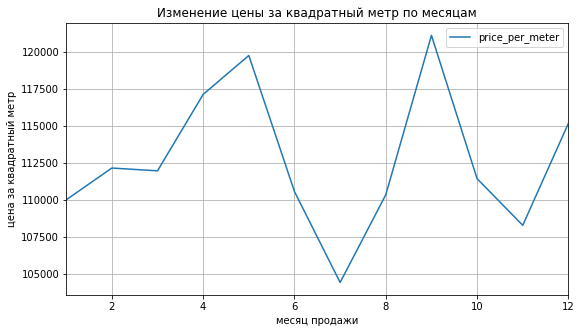

In [ ]:
spb_city_center.pivot_table(index='month', values='price_per_meter', aggfunc='median').plot(grid=True, figsize=(9, 5))
plt.title('Изменение цены за квадратный метр по месяцам')
plt.xlabel('месяц продажи')
plt.ylabel('цена за квадратный метр')
plt.show()

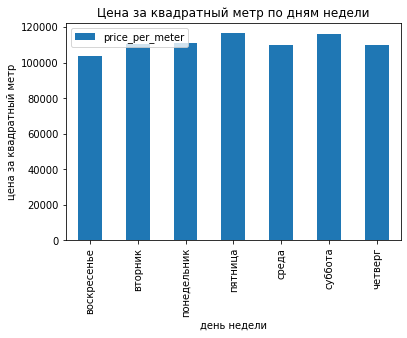

In [ ]:
spb_city_center.pivot_table(index='weekday', values='price_per_meter', aggfunc='median').plot(kind='bar')
plt.title('Цена за квадратный метр по дням недели')
plt.xlabel('день недели')
plt.ylabel('цена за квадратный метр')
plt.show()

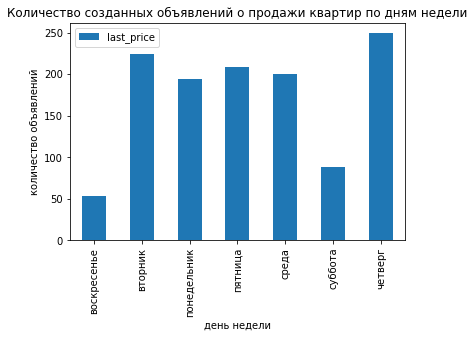

In [ ]:
spb_city_center.pivot_table(index='weekday', values='last_price', aggfunc='count').plot(kind='bar')
plt.title('Количество созданных объявлений о продажи квартир по дням недели')
plt.xlabel('день недели')
plt.ylabel('количество объявлений')
plt.show()

Проанализировав данные о сегменте квартир в центральной части города, можно сказать, что в целом зависимость факторов на стоимость квадратного метра очень схожа с общими вывадами по всем населенным пункам. Единственное, что бросается в глаза при исследовании изменения стоимости квадратного метра в течение года наблюдаются большие выбросы увеличения стоимости. 

### Шаг 5. Общий вывод
<a id="conclusion"></a>

В данном проекте изучили данные о продажах квартир в Санкт-Петербурге и близлежащих городах. В данных содержалась информация о характеристиках продаваемых квартир: площадь, цена, количество комнат, этаж, высота потолков, расстояние до центра города, дата создания объявления и т.д.

На сдадии предобработки данных столкнулись с отсутствием данных в некоторых столбцах. Там, где уместно данные заполнили, остальные пропуски оставили, так как подходящих значений для замены нет. Заметили, что основная часть пропущенных значений приходится на данные, которые были получены автоматически. 

Добавили необходимые для исследования данные: рассчитали стоимость за квадратный метр, добавили столбцы с днем недели, месяцем и годом публикации объявления.
Затем изучили определенные параметры, по каждому из которых построили гистограмму. И на основе полученных выводов о данных убрали редкие и выбивающиеся значения.

И наконец провели анализ объявлений о продаже квартир в Санкт-Петербурге и близлежащих городов. Рассмотрели влияние на стоимость различных факторов (площадь, высота потолков, количество комнат, этаж, дата размещения, удаленность от центра). Затем выделили сегмент квартир в центре Санкт-Петербурга и так же сравнили влияние различных данных на их стоимость.  
В ходе исследования выяснили, что на цену квартиры влияет множество факторов. Можно сделать следующие основные выводы:
* При увеличении площади и следовательно количества комнат увеличивается стоимость квартиры, что вполне логично. Однако, чем больше квартира по площади, тем дешевле цена за квадратный метр. 
* Выяснили, что день недели на стоимость не влияет. Но наибольшее количество объявлений создаются в будние дни.
* Заметили, что самые дорогие квартиры продавали в 2014-2015 году, а вот цена за квадратный метр наоборот в последние годы растет. Наиболее высокая стоимость у квартир, объявление которых было создано в декабре, а в июне заметно значительное понижение цен.
